<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#탐색적-분석" data-toc-modified-id="탐색적-분석-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>탐색적 분석</a></span><ul class="toc-item"><li><span><a href="#X변수-특성" data-toc-modified-id="X변수-특성-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>X변수 특성</a></span></li><li><span><a href="#X변수---V1~28-탐색적-분석" data-toc-modified-id="X변수---V1~28-탐색적-분석-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>X변수 - V1~28 탐색적 분석</a></span></li><li><span><a href="#X변수--Time,-Amount-탐색적-분석" data-toc-modified-id="X변수--Time,-Amount-탐색적-분석-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>X변수 -Time, Amount 탐색적 분석</a></span></li><li><span><a href="#Y변수-특성" data-toc-modified-id="Y변수-특성-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Y변수 특성</a></span></li></ul></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#V1~V28-전처리" data-toc-modified-id="V1~V28-전처리-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>V1~V28 전처리</a></span></li><li><span><a href="#Time-변수-전처리" data-toc-modified-id="Time-변수-전처리-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Time 변수 전처리</a></span></li><li><span><a href="#Amount-변수-전처리" data-toc-modified-id="Amount-변수-전처리-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Amount 변수 전처리</a></span></li><li><span><a href="#DataFrame에서-X,-Y-추출-및-Scaling" data-toc-modified-id="DataFrame에서-X,-Y-추출-및-Scaling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>DataFrame에서 X, Y 추출 및 Scaling</a></span></li></ul></li><li><span><a href="#데이터-샘플링" data-toc-modified-id="데이터-샘플링-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 샘플링</a></span></li><li><span><a href="#4.-모델링-및-평가" data-toc-modified-id="4.-모델링-및-평가-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. 모델링 및 평가</a></span><ul class="toc-item"><li><span><a href="#성능평가" data-toc-modified-id="성능평가-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>성능평가</a></span></li></ul></li><li><span><a href="#함수-정의" data-toc-modified-id="함수-정의-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>함수 정의</a></span></li></ul></div>

In [1]:
#!pip install imblearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 전처리
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale


# 데이터 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 모델링
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')           # 성가신 warning은 off 해준다.

Kaggle Page : https://www.kaggle.com/mlg-ulb/creditcardfraud/discussion

기존 공유 자료 외 참고 kernels:https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow

### 탐색적 분석
#### X변수 특성
- X는 Time, Amount와 PCA 주성분으로 이루어진 V1~V28로 총 31개의  변수로 이루어짐
- Y변수(class)는 0과 1로 이루어진 명목형 변수로 Classification예측 과제
- 관측치의 결측값은 없음

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
round(df.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.shape

(284807, 31)

#### X변수 - V1~28 탐색적 분석
- 이상거래와 정상거래에서 유사한 분포를 보이는 변수를 제거 ('V5','V6','V7','V8','V9','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28')<br>
<span style = 'color:red'> 빨간색 그래프 => 이상거래</span><br>
<span style = 'color:blue'> 파란색 그래프 => 정상거래</span>

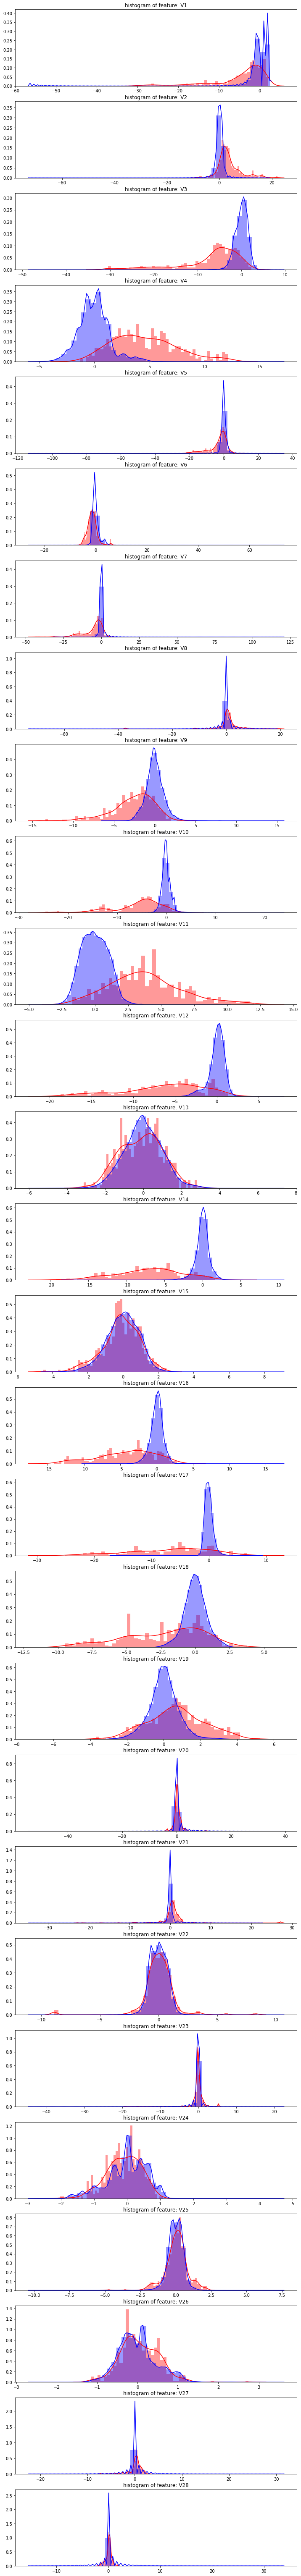

In [7]:
# V1~V28만 추출
v_features = df.ix[:,1:29].columns

# Class 1과 0 으로 구분하여 시각화
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50, color='r')
    sns.distplot(df[cn][df.Class == 0], bins=50, color='b')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

#### X변수 -Time, Amount 탐색적 분석
- 전체 'Time'에서 건수가 적은 부분(0~25,000 & 90,000~110,000)을 밤시간대로 보면,  이상거래가 정상거래에 비해 밤시간대에 많이 발생하고 아침시간에 더 적은 건수를 보인다.
- 'Amount'는 정상거래가 범위가 넓고, 이상거래는 2500내에 분포되어 있다.

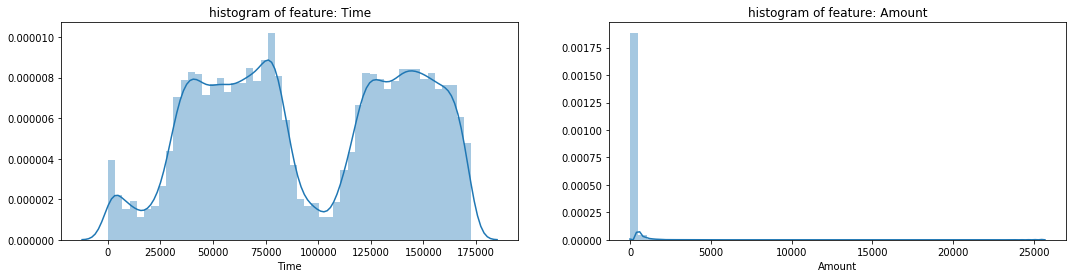

In [8]:
# Amount, Time 히스토그램
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Time'], ax=ax[0], bins = 50).set_title('histogram of feature: Time')
sns.distplot(df['Amount'], ax=ax[1],  bins = 50).set_title('histogram of feature: Amount')
plt.show()

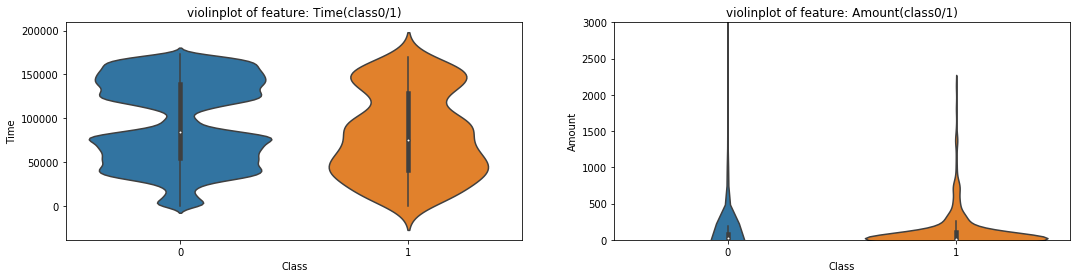

In [9]:
# Amount, Time 정상/이상거래 분포 비교
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.violinplot(x=df['Class'], y=df['Time'], ax=ax[0]).set_title('violinplot of feature: Time(class0/1)')
sns.violinplot(x=df['Class'], y=df['Amount'], ax=ax[1]).set(ylim=(0, 3000), title=('violinplot of feature: Amount(class0/1)'))
plt.show()

#### Y변수 특성
- Y변수가 비율이 현저히 낮아 이상거래(class1) case를 충분히 학습할 수 있도록 적절한 Data Sampling 방법 필요 (Under Sampling, Over Sampling 등)

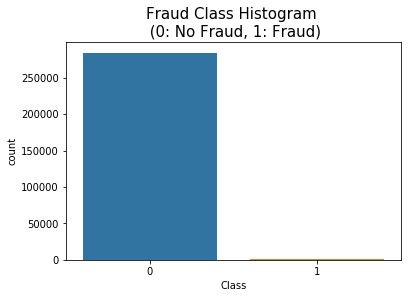

0    284315
1       492
Name: Class, dtype: int64
전체 데이터 중 class가 1인 데이터의 비율 : 0.172749 %
전체 데이터 중 class가 0인 데이터의 비율 : 99.827251 %


In [10]:
# Y값 카운트
vc = df.Class.value_counts()
sns.countplot(df.Class);
plt.title('Fraud Class Histogram \n (0: No Fraud, 1: Fraud)', fontsize = 15)
plt.show()
print(vc)
print('전체 데이터 중 class가 1인 데이터의 비율 : %f'%(vc[1]/vc.values.sum()*100),'%')
print('전체 데이터 중 class가 0인 데이터의 비율 : %f'%(vc[0]/vc.values.sum()*100),'%')

In [ ]:
# Amount, Time 히스토그램
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Time'], ax=ax[0], bins = 50).set_title('histogram of feature: Time')
sns.distplot(df['Amount'], ax=ax[1],  bins = 50).set_title('histogram of feature: Amount')
plt.show()

### 데이터 전처리
#### V1~V28 전처리
- 정상/이상거래의 분포차이가 큰 변수를 제외한 나머지는 삭제

In [ ]:
# V1~V28 변수 중 정상/이상거래의 확연한 차이가 없는 변수 삭제(임의)
df = df.drop(['V1','V5','V6','V7','V8','V9','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis =1)

#### Time 변수 전처리 
- Time변수를 1~48까지 구간화(1시간 단위)<br>
Time변수를 3600으로 나눠 매 시간으로 구분할 경우(Time_dumy_48), 47.x 시간으로 나눠져 대략 이틀간 관측치로 보인다.<br>
Time_dumy_48로 나누어 첫번째 트랜젝션 이후 특정 시간대에 발생 비율이 높게 나타난다.(10~24, 30~41, 44~48)

- Time변수를 1~24까지 구간화(2시간 단위)<br>
48시간으로 나눈 변수를 날짜에 상관없이 시간대로만 구분하여 Time_dumy_24를 별도로 생성하였다.<br>
Time_dumy_24로 나누어 보면 전체 대비 시간대 비율로 보여지기에 9시 이후 대부분 이상거래가 높게 발생한다.
- <span style = 'color:red'> 상기와 같은 이유로 정상/이상 거래를 더 잘 구분할 수 있는 변수는 'Time_dumy_48'로 판단한다.</span>

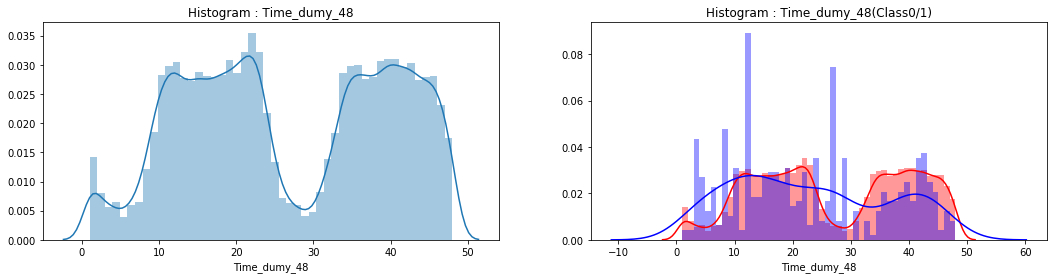

In [12]:
# Time 변수 더미 변수 생성

# Time변수를 더미변수로 변환 초단위에서 3600을 나눠 시간단위로 변환
df['Time_dumy_48'] = df['Time'].apply(lambda x : int(x/3600) + 1 ) 

# 1~48인 변수를 24로 나누어 날짜에 상관없이 1~24시로 간추림
df['Time_dumy_24'] = df['Time_dumy_48'].apply(lambda x : (x <= 24 and x) or (x > 24 and x - 24) )

# Time_dumy_48 시각화
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Time_dumy_48'], ax=ax[0], bins = 48).set_title('Histogram : Time_dumy_48')
sns.distplot(df['Time_dumy_48'][df.Class==0], ax=ax[1],  bins = 48, color='r').set_title('Histogram : Time_dumy_48(Class0/1)')
sns.distplot(df['Time_dumy_48'][df.Class==1],  ax=ax[1],  bins = 48, color='b')
plt.show()

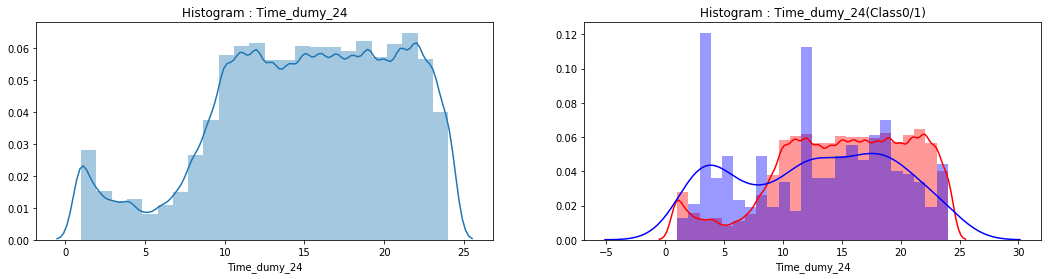

In [13]:
# Time_dumy_24 시각화
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Time_dumy_24'], ax=ax[0], bins = 24).set_title('Histogram : Time_dumy_24')
sns.distplot(df['Time_dumy_24'][df.Class==0], ax=ax[1],  bins = 24, color='r').set_title('Histogram : Time_dumy_24(Class0/1)')
sns.distplot(df['Time_dumy_24'][df.Class==1],  ax=ax[1],  bins = 24, color='b')
plt.show()

#### Amount 변수 전처리
- Amount가 왼쪽으로 치우친 값을 중앙으로 설정하기 위해 log값을 취한다.

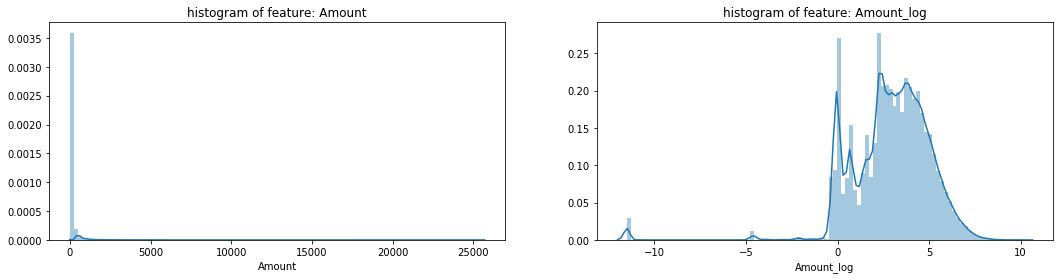

원래 Amount 왜도 값 : 16.98, Amount_log 왜도 값: -1.87 

------df['Amount'].descsribe()------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

------df['Amount_log'].descsribe()------
count    284807.000000
mean          2.912111
std           2.194659
min         -11.512925
25%           1.722767
50%           3.091042
75%           4.345946
max          10.153902
Name: Amount_log, dtype: float64


In [11]:
# Amount 변수 로그취함

df['Amount_log'] = df['Amount'].apply(lambda x : (x == 0 and np.log(x+0.00001) ) or (x != 0 and np.log(x) ) )

Amount_skew = st.stats.skew(df['Amount'])
Amount_log_skew = st.stats.skew(df['Amount_log'])

fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Amount'], ax=ax[0], bins = 100).set_title('histogram of feature: Amount')
sns.distplot(df['Amount_log'], ax=ax[1],  bins = 100).set_title('histogram of feature: Amount_log')
plt.show()
print(f'원래 Amount 왜도 값 : {round(Amount_skew,2)}, Amount_log 왜도 값: {round(Amount_log_skew, 2)} ')
print('')
print('''------df['Amount'].descsribe()------''')
print(df['Amount'].describe() )
print('')
print('''------df['Amount_log'].descsribe()------''')
print(df['Amount_log'].describe())

#### DataFrame에서 X, Y 추출 및 Scaling
- 모델링에 필요한 변수들만 사용
- Scaling 방법 중 기본 scale을 사용한다. 
    - scale(X): 기본 스케일. 평균과 표준편차 사용
    - robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
    - minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
    - maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링
- 기존의 V1~28 변수의 mean=0, std=1 내외이므로 V변수들의 손실을 최소화 하기 위한 방법


In [14]:
# X, y 변수설정
new_df = df.drop(columns=['Time', 'Time_dumy_24', 'Amount'])
#X = new_df.drop(columns=['Class','Time_dumy_24'])
round(new_df.describe(),2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log,Time_dumy_48
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,2.91,26.85
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.73,0.62,0.61,0.52,0.48,0.40,0.33,0.04,2.19,13.18
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,-11.51,1.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,0.00,1.72,16.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,0.00,3.09,24.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.53,0.15,0.44,0.35,0.24,0.09,0.08,0.00,4.35,39.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,10.50,22.53,4.58,7.52,3.52,31.61,33.85,1.00,10.15,48.00


In [19]:
# V변수들과 mean, std를 맞추기 위해 Tima_dumy_48, Amount_log scale 처리
new_df['Time_dumy_48'] = scale(new_df['Time_dumy_48'])
new_df['Amount_log'] = scale(new_df['Amount_log'])

round(new_df.describe(),2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log,Time_dumy_48
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.73,0.62,0.61,0.52,0.48,0.40,0.33,0.04,1.00,1.00
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,-6.57,-1.96
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,0.00,-0.54,-0.82
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,0.00,0.08,-0.22
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.53,0.15,0.44,0.35,0.24,0.09,0.08,0.00,0.65,0.92
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,10.50,22.53,4.58,7.52,3.52,31.61,33.85,1.00,3.30,1.60


In [20]:
X = new_df.drop(columns=['Class'])
# X변수 Scale
y = new_df['Class']

In [21]:
# X = scale(X)
# X = minmax_scale(X)
# X = robust_scale(X)
# X = maxabs_scale(X)

### 데이터 샘플링
불균형 데이터를 다루는 방법에는 두 가지 전략이 있다. 분류 알고리즘을 향상하는 방법과 training data에서 클래스의 균형을 맞추는 방법이다. 보통 샘플링으로 문제를 접근하는 것이 선호되며 샘플링 방법에 따라 장단점이 존재한다.
1. Random Under Sampling<br>
    무작위로 다수 클래스의 예제를 제거하여 클래스 분포의 균형을 맞춘다.<br>
    장점 : 샘플의 수를 줄임으로써 공간,시간 문제를 개선할 수 있다.<br>
    단점 : 분류기를 만들 때 중요한 정보를 누락할 수 있다.<br>
2. Random Over Sampling<br>
    소수 클래스의 인스턴스를 복사하여 수를 늘려서 균형을 맞춘다.<br>
    장점 : 정보의 손실이 없고 under sampling 보다 성능이 좋다.<br>
    단점 : 소수 클래스를 복사하므로 과적합의 가능성이 있다.<br>
3. Cluster-Based Over Sampling<br>
    K-means알고리즘을 적용하여 소수/다수 인스턴스 클러스터로 구분하고 소수/다수 클러스터별 오버샘플링하여 인스턴스 균형을 맞춘다.<br>
    장점 : 클래스의 불균형을 해결하며, 클래스가 다른 서브 클러스터로 구성되어 있을 때의 불균형 문제도 극복할 수 있다.<br>
    단점 : 과적합의 가능성이 있다.<br>
4. SMOTE (Informed Over Sampling)<br>
    소수 클래스의 복제본이 더해짐으로써 발생되는 과적합을 피하는 기술<br>
    데이터의 부분집합과 소수 클래스로부터 새로운 소수 클래스 인스턴스가 만들어지면서 OverSampling 한다. 샘플의 기준으로 Knn을 이용한다.<br>
    장점 : 과적합 문제의 완화, 데이터 손실 없음<br>
    단점 : 근접의 예제를 생각하지 않기때문에 노이즈로 인한 클래스 겹침이 발생할 수 있다. 또한 고차원 데이터에서는 효과적이지 않을 수 있다.

In [23]:
X_train, X_test, y_train, y_test=UnderSampling(X,y, under=0.5,ratio=0.3)
# X_train, X_test, y_train, y_test=OverSampling(X,y, over=0.01,ratio=0.3)
# X_train, X_test, y_train, y_test=SMOTESampling(X,y, over=0.01,ratio=0.3)
PrintBeforeAfterSampling()

 before sampling
number of y :  492
ratio  of y :  0.001727485630620034
shapes      :  (284807, 30) (284807,)

 after sampling
number of y :  346 146
ratio  of y :  0.33494675701839305 0.3295711060948081
shapes      :  (1033, 30) (443, 30) (1033,) (443,)


### 4. 모델링 및 평가
- 데이터 전처리의 성능평가를 위해 로지스틱 회귀 선택
- 현 Case는 이상거래를 탐지하기 위해 Precision과 Recall로 판단
    - Precision : 이상거래 예측치(모델) 중 실제 이상거래 %
    - Recall : 실제 이상거래 중 이상거래 예측치(모델) %
    
#### 성능평가
- Recall 91.78%, Precision 97.81%로 나온다.
- V변수는 PCA의 주성분이므로 별도의 전처리 없이 표준화만 진행하였고, 현 Case에서 성능을 끌어 올릴 수 있는 변수는 Time, Amount이다.
    -Time변수에 있어 단순히 구간화만이 아닌 선형관계로 설정할 경우 더 성능이 높아질 것으로 예상되나 정확한 방법을 구상할 수 없어 개선이 요구된다.
- 로지스틱 회귀가 아닌 다른 분류모델이나 인공신경망을 사용하여 성능 개선의 여지가 있다.

In [24]:
glm = LogisticRegression()
glm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

{'confusion matrix': array([[294,   3],
        [ 12, 134]], dtype=int64),
 'acc': 0.9661399548532731,
 'recall': 0.9178082191780822,
 'precision': 0.9781021897810219,
 'f1 score': 0.9469964664310954,
 'average precision': 0.9783354393015283}

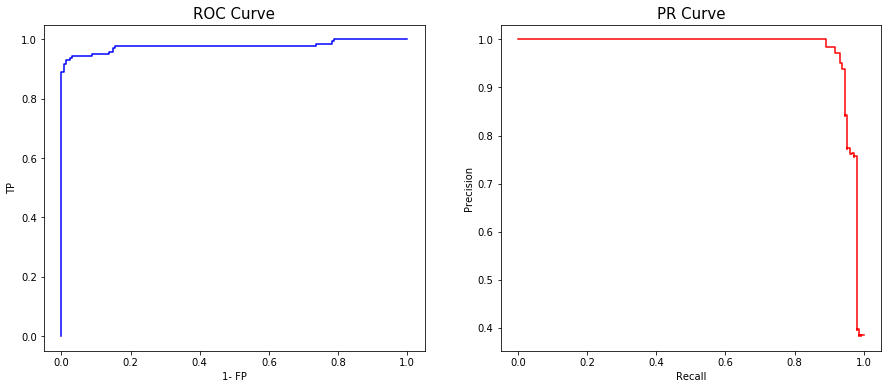

In [25]:
y_pred = glm.predict_proba(X_test)
evaluation_class(y_test,y_pred,true_idx=1,thresholds = 0.5)

### 함수 정의
- 샘플링과 모델평가에 필요한 함수를 정의한다.

In [15]:
## 데이터 샘플링 함수

# UnderSampling (RandomUnderSampler)
def UnderSampling(data, label, under=1.0, ratio=0.3):
    # under = Minor class / Major class
    rus = RandomUnderSampler(sampling_strategy=under, random_state=1234) 
    X_resampled, y_resampled = rus.fit_resample(data, label)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio, random_state=1234)
    return X_train, X_test, y_train, y_test

# OverSampling(RandomOverSampler)
def OverSampling(data, label, over=1.0, ratio=0.3):
    # over = Minor class / Major class
    rus = RandomOverSampler(sampling_strategy=over, random_state=1234) 
    X_resampled, y_resampled = rus.fit_resample(data, label)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio, random_state=1234 )
    return X_train, X_test, y_train, y_test

# OverSampling(SMOTE)
def SMOTESampling(data, label, over=1.0, ratio=0.3):
    # over = Minor class / Major class
    rus = RandomOverSampler(sampling_strategy=over, random_state=1234) 
    X_resampled, y_resampled = rus.fit_resample(data, label)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio, random_state=1234)
    return X_train, X_test, y_train, y_test

# 데이터 샘플링 확인
def PrintBeforeAfterSampling():
    print(' before sampling')
    print('number of y : ', np.sum(y))
    print('ratio  of y : ', np.sum(y)/y.shape[0])
    print('shapes      : ', X.shape, y.shape)
    print('\n after sampling')
    print('number of y : ', np.sum(y_train), np.sum(y_test))
    print('ratio  of y : ', np.sum(y_train)/y_train.shape[0],np.sum(y_test)/y_test.shape[0])
    print('shapes      : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [16]:
# Evaluation
def evaluation_class(y_true,y_pred,true_idx=1,thresholds = 0.5):
    
    from sklearn import metrics # for result
    import matplotlib.pyplot as plt # for visualization
    
    # tranform y_pred into integer array
    y_pred_val = ([1 if prob>thresholds else 0 for prob in y_pred[:,true_idx]])
    # counfusion matrix
    conf_mat = metrics.confusion_matrix(y_true,y_pred_val)
    
    #acc
    acc = metrics.accuracy_score(y_true,y_pred_val)   
    #recall
    re = metrics.recall_score(y_true,y_pred_val) 
    #precision
    pre = metrics.precision_score(y_true,y_pred_val)
    #f1
    f1 = metrics.f1_score(y_true,y_pred_val)   
    #average precsion
    avg_pre = metrics.average_precision_score(y_true,y_pred[:,true_idx])  
    
    # visualization
    fig,ax = plt.subplots(1,2,figsize = (15,6))
    
    # ROC
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_pred[:,true_idx])
    ax[0].plot(fpr,tpr,color = 'b')
    ax[0].set_title('ROC Curve',fontsize = 15)
    ax[0].set_xlabel('1- FP')
    ax[0].set_ylabel('TP')
    
    # PR
    precision,recall,thresholds = metrics.precision_recall_curve(y_true,y_pred[:,true_idx])
    ax[1].step(recall,precision,color = 'r', where = 'post')
    ax[1].set_title('PR Curve',fontsize = 15)
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    
    
    # 결과 저장
    result_dic = {
        'confusion matrix':conf_mat,
        'acc':acc,
        'recall':re,
        'precision':pre,
        'f1 score':f1,
        'average precision':avg_pre
    }
    return result_dic